# Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

The Artic Sea Ice Extent (SIE) dataset tracks the total region with at least 15% sea ice cover from 1978 through 2018. This dataset was found on data.world, but its original source is the [National Snow & Ice Data Center](https://nsidc.org/data/explore-data). I chose this dataset because I wanted to look at the effects of climate change. <br><br>
The dataset contains two columns: Date and Extent (million sq km) and contains 12751 samples. The extent column, which is measured in million square kilometers, was record every 2 days between October 1978 and March 2018.

In [17]:
# Importing the data
sea_ice_df = pd.read_csv('./data/arctic_sea_ice_extent.csv')
sea_ice_df.head()

,Date,Extent (million sq km)
0,10/26/1978,10.231
1,10/28/1978,10.420
2,10/30/1978,10.557
3,11/1/1978,10.670
4,11/3/1978,10.777


In [3]:
sea_ice_df.shape

(12751, 2)

In [18]:
# Update column names
sea_ice_df = convert_column_names(sea_ice_df)

Reformatted column names: Index(['date', 'extent_million_sq_km'], dtype='object')


In [20]:
# Save csv
sea_ice_df.to_csv("./data/arctic_sie_clean.csv", index=False)

In [6]:
# Create year and month columns
sea_ice_df['year'] = pd.DatetimeIndex(sea_ice_df['date']).year
sea_ice_df['month'] = pd.DatetimeIndex(sea_ice_df['date']).month

In [7]:
# View the data
sea_ice_df.head(-10)

,date,extent_million_sq_km,year,month
0,10/26/1978,10.231,1978,10
1,10/28/1978,10.420,1978,10
2,10/30/1978,10.557,1978,10
3,11/1/1978,10.670,1978,11
4,11/3/1978,10.777,1978,11
...,...,...,...,...
12736,3/17/2018,14.466,2018,3
12737,3/18/2018,14.349,2018,3
12738,3/19/2018,14.309,2018,3
12739,3/20/2018,14.210,2018,3


In [8]:
# Count nulls
sea_ice_df.isna().sum(0)

date                    0
extent_million_sq_km    0
year                    0
month                   0
dtype: int64

No missing values in the original and additional columns.

In [9]:
# Count values per year
yearly_sample_count_df = sea_ice_df.groupby('year')['extent_million_sq_km'].count().reset_index(name='measurements_taken')
yearly_sample_count_df.head()

,year,measurements_taken
0,1978,34
1,1979,182
2,1980,183
3,1981,183
4,1982,182


Measurements were taken approximately every 2 days from 1978 to 1987. From 1988 to 2018, there is a daily measurement recorded, which means the frequency of recordings was increased two-fold.

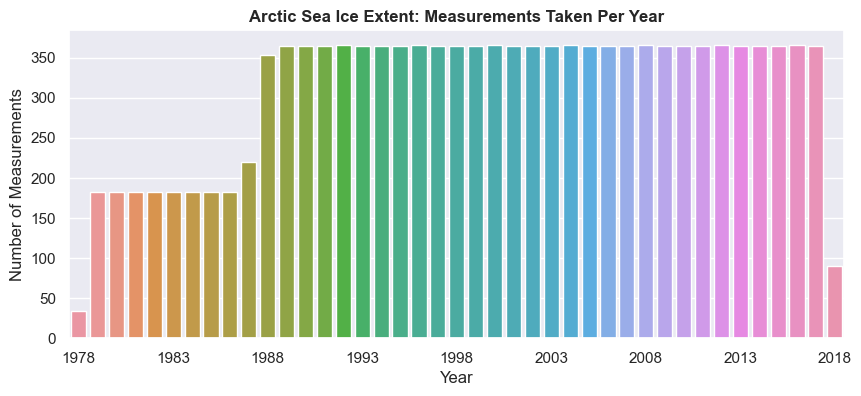

In [10]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

# Plot number of measurements taken per year
plot_ = sns.barplot(yearly_sample_count_df, x="year", y="measurements_taken")
plt.title('Arctic Sea Ice Extent: Measurements Taken Per Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Measurements')

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig('figures/measurements_per_year.png')
plt.show()

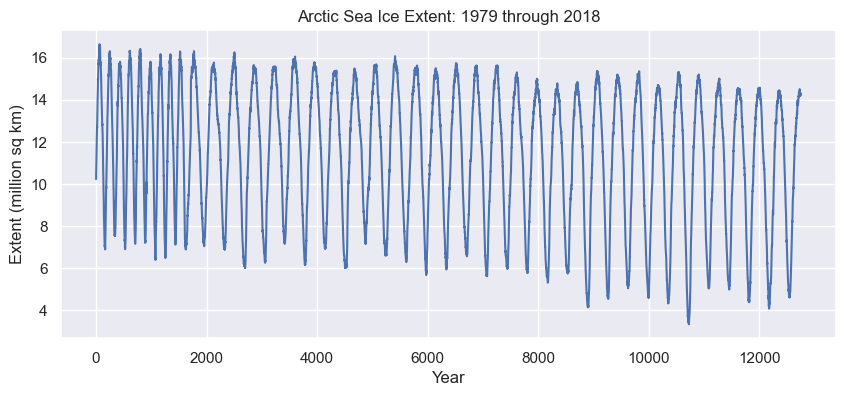

In [11]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

# Plot time series of SIE
plt.plot(sea_ice_df.index, sea_ice_df['extent_million_sq_km'])
plt.title("Arctic Sea Ice Extent: 1979 through 2018")
plt.xlabel("Year")
plt.ylabel("Extent (million sq km)")

# Set x-axis tick labels
# ticks = ['1978','1983','1988','1993','2003','2008','2013','2018']
# g.set_xticks(range(len(sea_ice_df)))
# g.get_xticklabels(ticks)

# Save and plot figure
# plt.savefig('figures/ts_1978_2018.png')
plt.show()

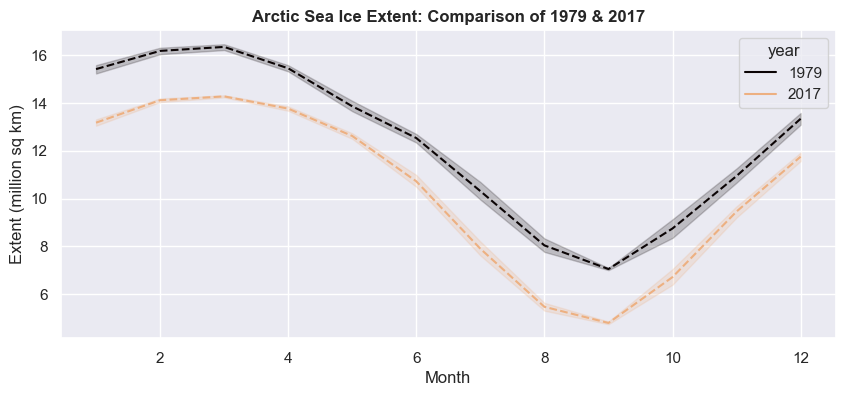

In [12]:
sns.set_style('darkgrid')

# Filtering data for specific years (assuming 'sea_ice_df' is your DataFrame)
sea_ice_1979 = sea_ice_df[sea_ice_df['year'] == 1979]
sea_ice_2017 = sea_ice_df[sea_ice_df['year'] == 2017]

# Create subplots with two rows and one column
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Plot for 1978 on the first subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_1979, hue='year', linestyle='dashed', palette='mako', ax=axes)
# Plot for 2018 on the second subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_2017, hue='year', linestyle='dashed', palette='flare', ax=axes)

axes.set_title('Arctic Sea Ice Extent: Comparison of 1979 & 2017', fontweight='bold')
axes.set_xlabel('Month')
axes.set_ylabel('Extent (million sq km)')

# Save and show plot
plt.savefig('figures/period_comparison.png')
plt.show()

In [13]:
# # Plot
# sns.set_theme(style="darkgrid")

# # Plot each year's time series in its own facet
# g = sns.relplot(data=sea_ice_df, x="month", y="extent_million_sq_km", 
#                 col="year", hue="year", kind="line", palette="crest", 
#                 linewidth=1, zorder=5, col_wrap=3, height=2, aspect=1.5, 
#                 legend=False        
#             )

# # Iterate over each subplot to customize further
# for year, ax in g.axes_dict.items():
#     # Add the title as an annotation within the plot
#     ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

# # Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# # Tweak the supporting aspects of the plot
# plt.title("Arctic Sea Ice Annual Trend")
# g.set_axis_labels("", "Extent (M km^2)")
# g.tight_layout()

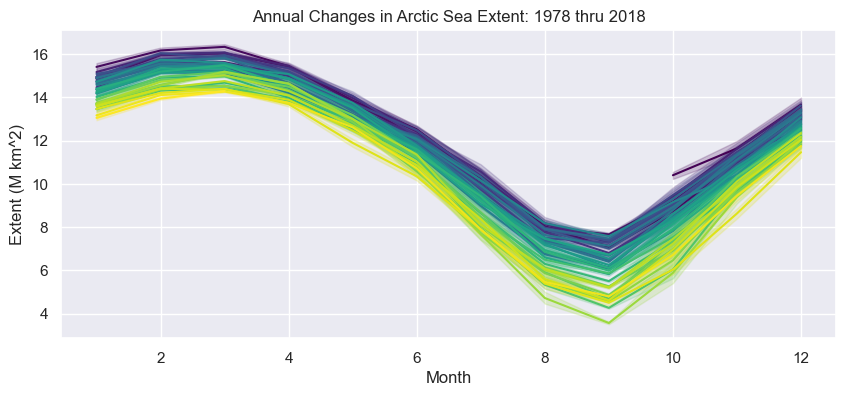

In [14]:
# Plot annual changes in sea ice extent
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

sns.lineplot(data=sea_ice_df, x="month", y="extent_million_sq_km", hue="year", palette="viridis", legend=False)
plt.title("Annual Changes in Arctic Sea Extent: 1978 thru 2018")
plt.xlabel("Month")
plt.ylabel("Extent (M km^2)")

# Save and show plot
plt.savefig('figures/sie_annual_changes.png')
plt.show()

In [15]:
# Average Annual Arctic Sea Ice Extent
avg_sie_df = sea_ice_df.groupby(sea_ice_df['year']).mean().drop(columns=["month"]).reset_index()
avg_sie_df = avg_sie_df[1:-1]
avg_sie_df.head(10)

,year,extent_million_sq_km
1,1979,12.319560
2,1980,12.334148
3,1981,12.135486
4,1982,12.439445
5,1983,12.335896
6,1984,11.912601
7,1985,11.986599
8,1986,12.208224
9,1987,11.397227
10,1988,12.093169


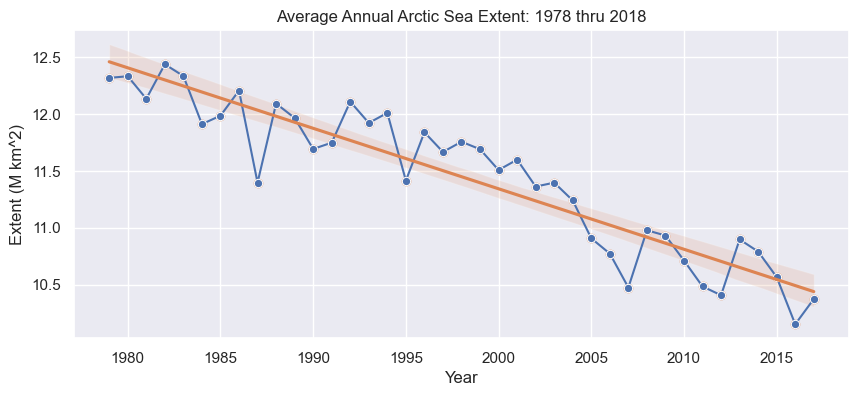

In [16]:
# Plot average annual sea ice extent
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

sns.lineplot(data=avg_sie_df, x="year", y="extent_million_sq_km", 
             palette="viridis", marker="o", legend=False)
sns.regplot(data=avg_sie_df, x="year", y="extent_million_sq_km")
plt.title("Average Annual Arctic Sea Extent: 1978 thru 2018")
plt.xlabel("Year")
plt.ylabel("Extent (M km^2)")

# Save and show plot
plt.savefig('figures/sie_annual_avg.png')
plt.show()